# Génération de la suite d'une mélodie connue : "Ah vous dirais-je maman"

In [1]:
import os
import music21 as m21
import json
from datetime import datetime
from preprocessing import *
from training import *

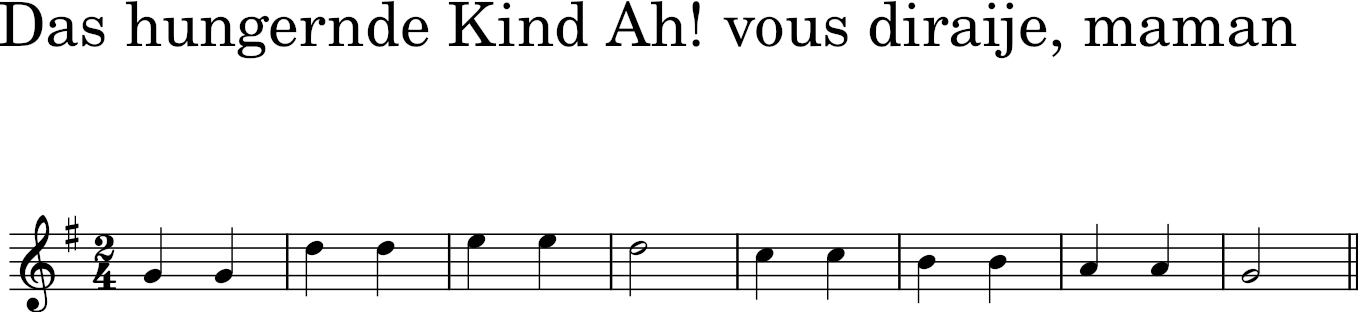

In [2]:
# Récupérer les notes de "Ah vous dirais-je maman"
french_dataset_path = "../data/france"
french_songs = load_songs(french_dataset_path, 100)
french_songs[11].show()
french_songs[11].show("midi")

old key :  G major


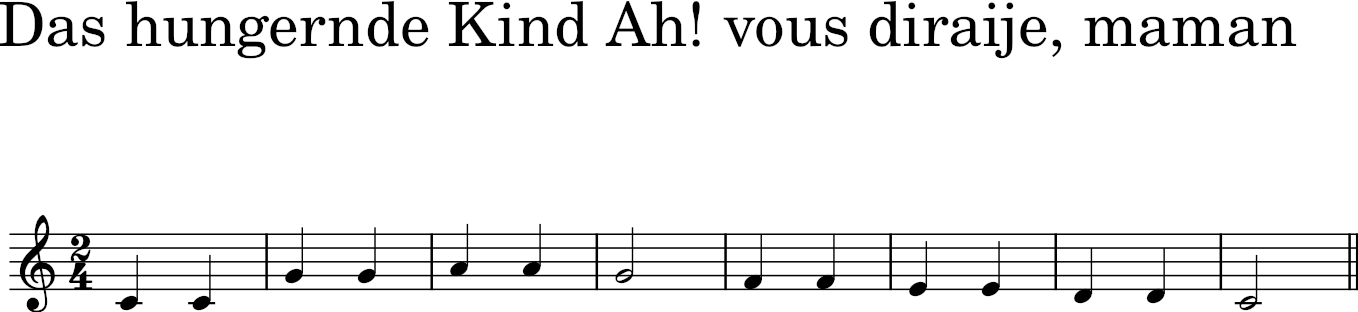

'../generated_melodies/RNN-LSTM/ahVousDiraisJeMaman/original.midi'

In [ ]:
test_song = transpose(french_songs[11], True)
test_song.show()
test_song.show("midi")

#test_song.write("midi", "../generated_melodies/RNN-LSTM/ahVousDiraisJeMaman/original.midi")

In [4]:
test_song = encode_song(test_song)

In [5]:
print(test_song)
print(test_song[:64]) # 4 premières mesures

60 _ _ _ 60 _ _ _ 67 _ _ _ 67 _ _ _ 69 _ _ _ 69 _ _ _ 67 _ _ _ _ _ _ _ 65 _ _ _ 65 _ _ _ 64 _ _ _ 64 _ _ _ 62 _ _ _ 62 _ _ _ 60 _ _ _ _ _ _ _
60 _ _ _ 60 _ _ _ 67 _ _ _ 67 _ _ _ 69 _ _ _ 69 _ _ _ 67 _ _ _ _


### Modèle entraîné sur le dataset han (chinois)

In [6]:
model = keras.models.load_model("../data/han/model_RNN_LSTM.keras")

# start symboles
start_symbols = ["/"] * 64

# mappings
with open("../data/han/mapping.json", "r") as fp:
    mappings = json.load(fp)

In [7]:
# Générer 10 mélodies à partir de ah vous dirais-je maman
melodies = []
for _ in range (10):
    melodies.append(generate_melody(model, start_symbols, mappings, test_song[:64], 500, 64, 0.7))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━

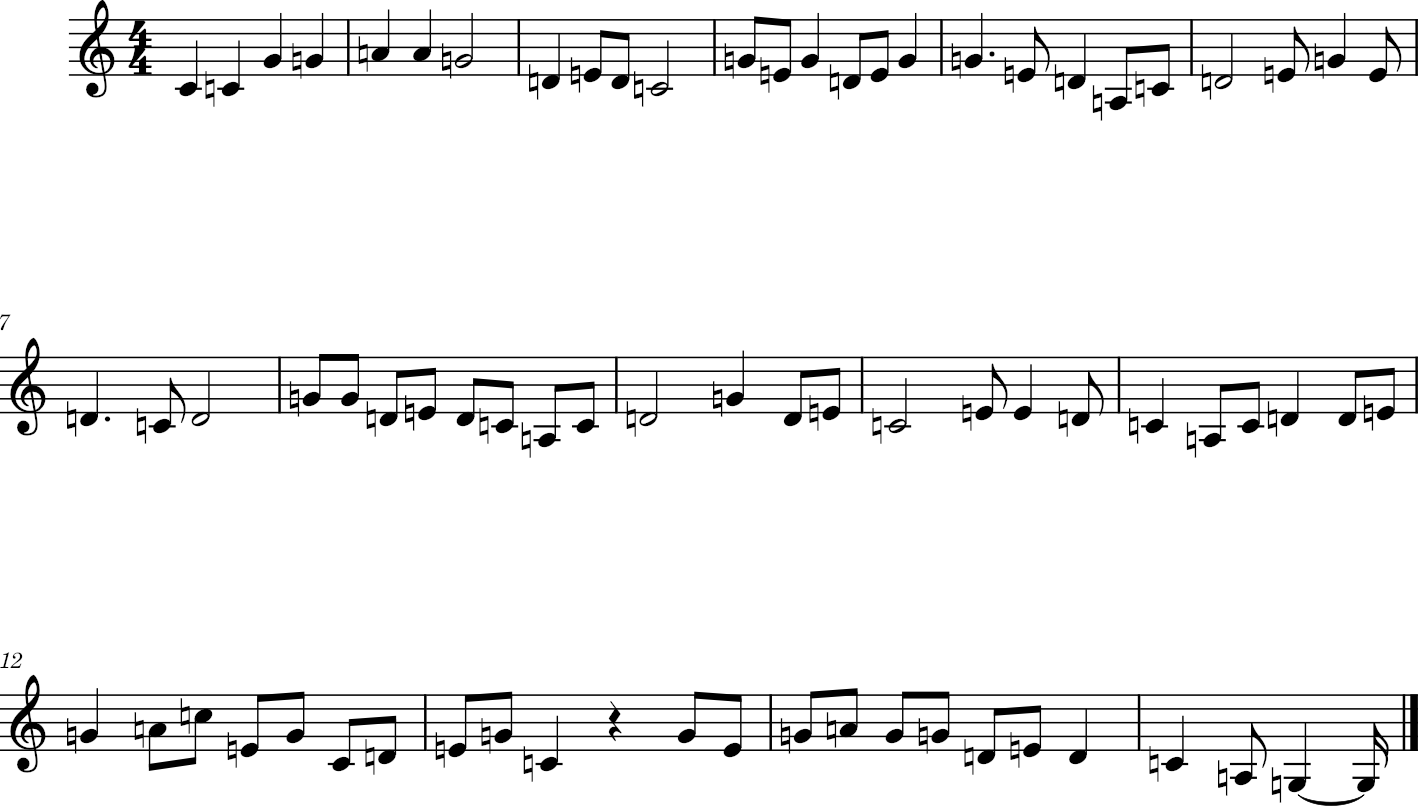

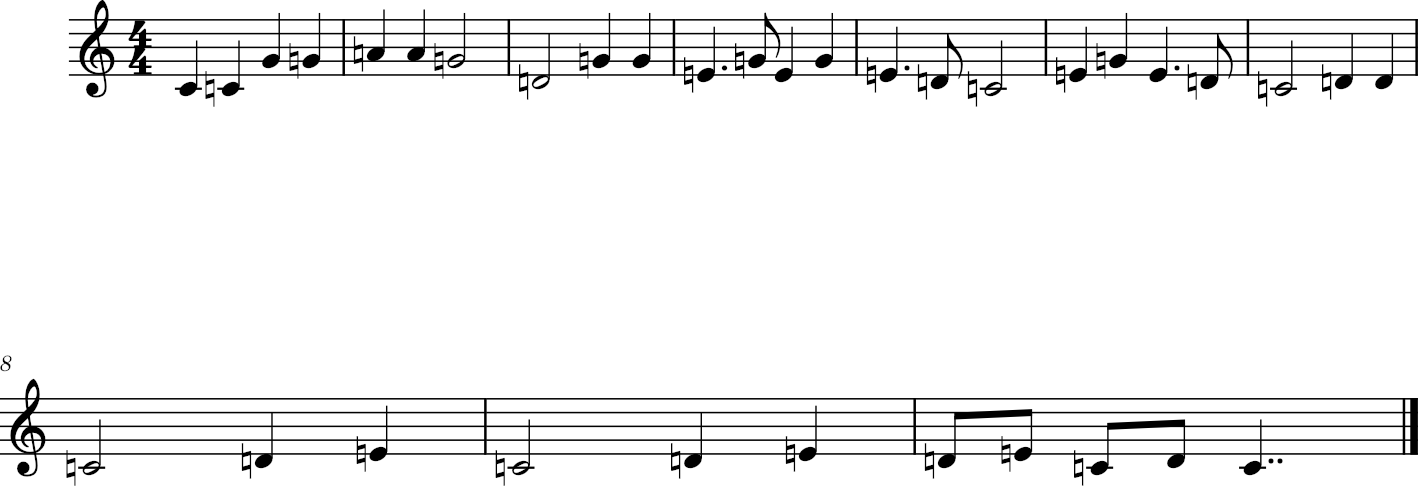

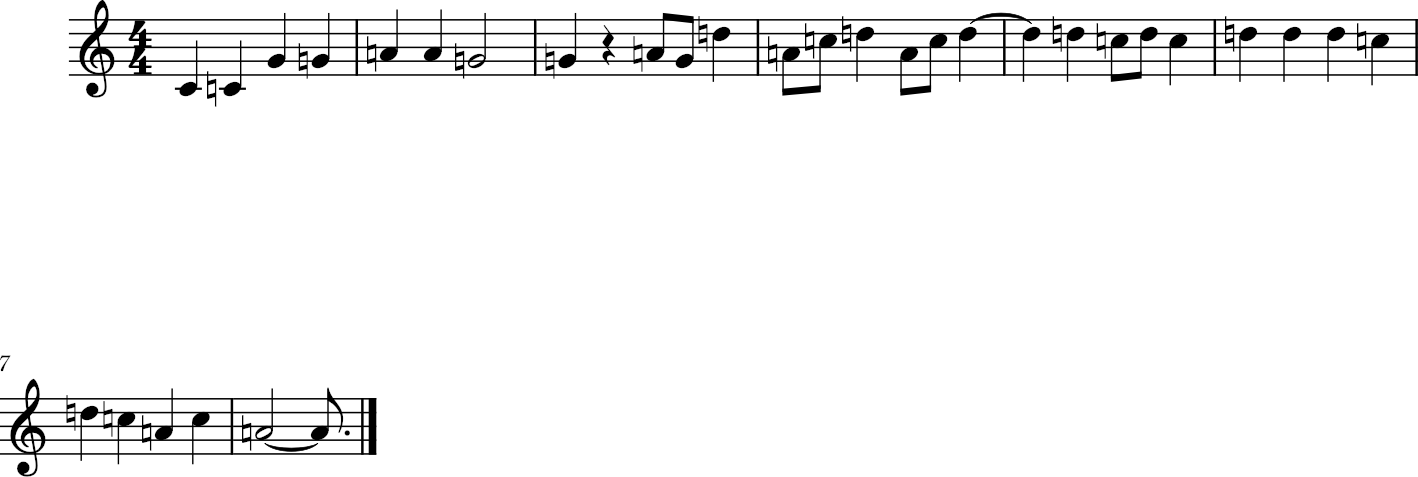

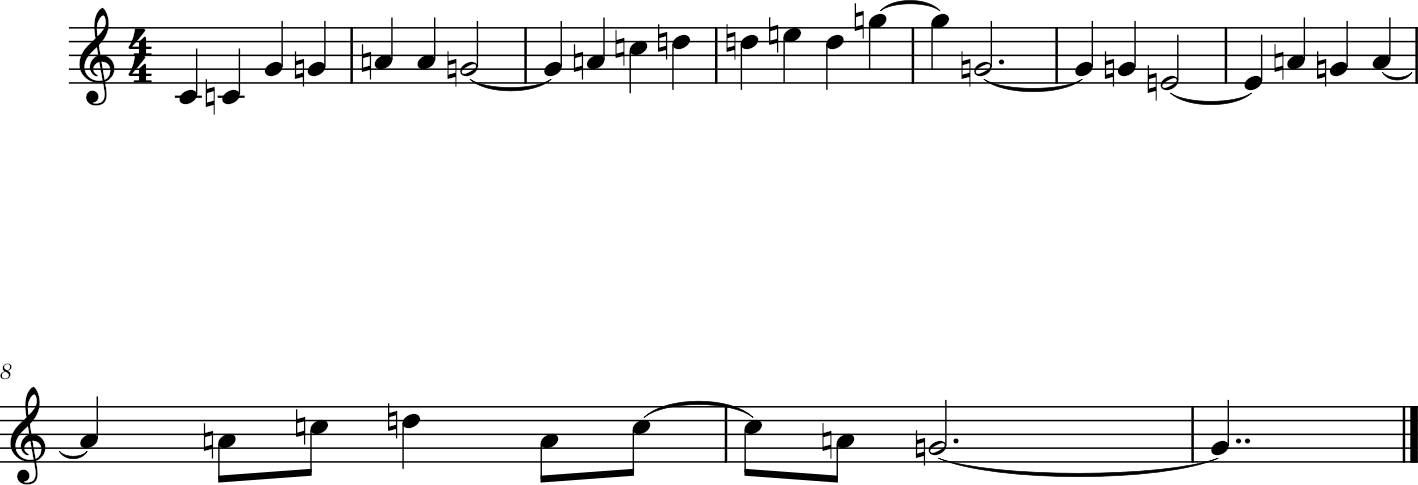

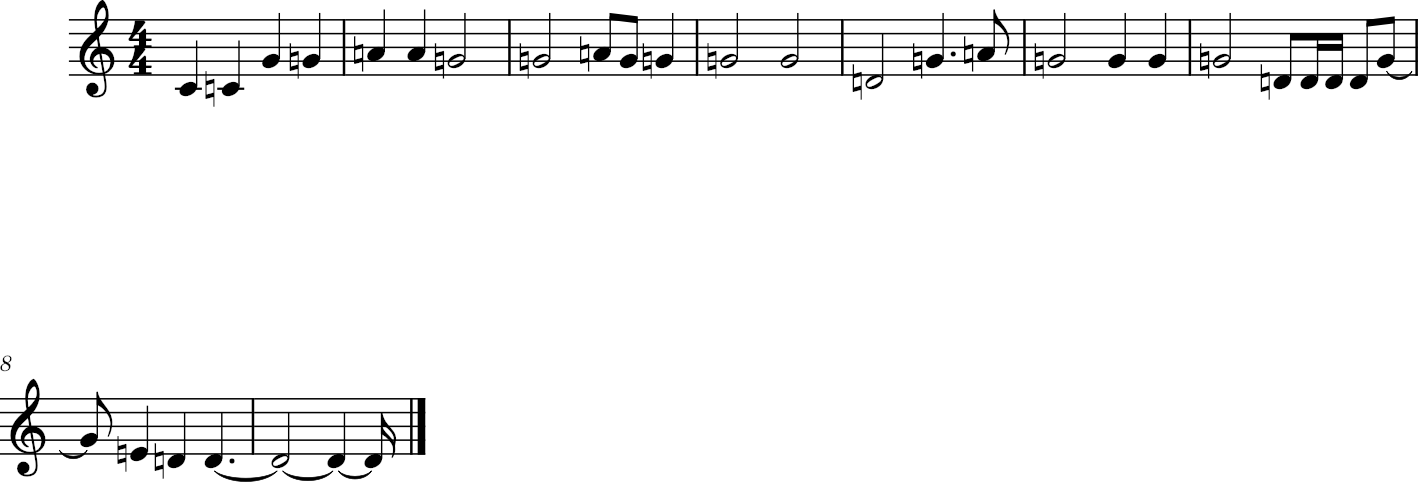

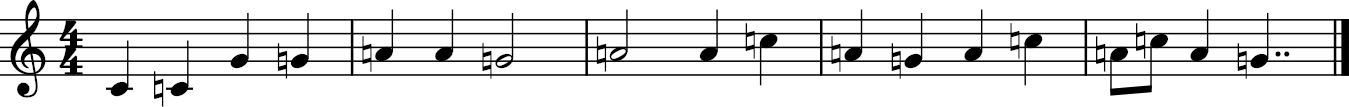

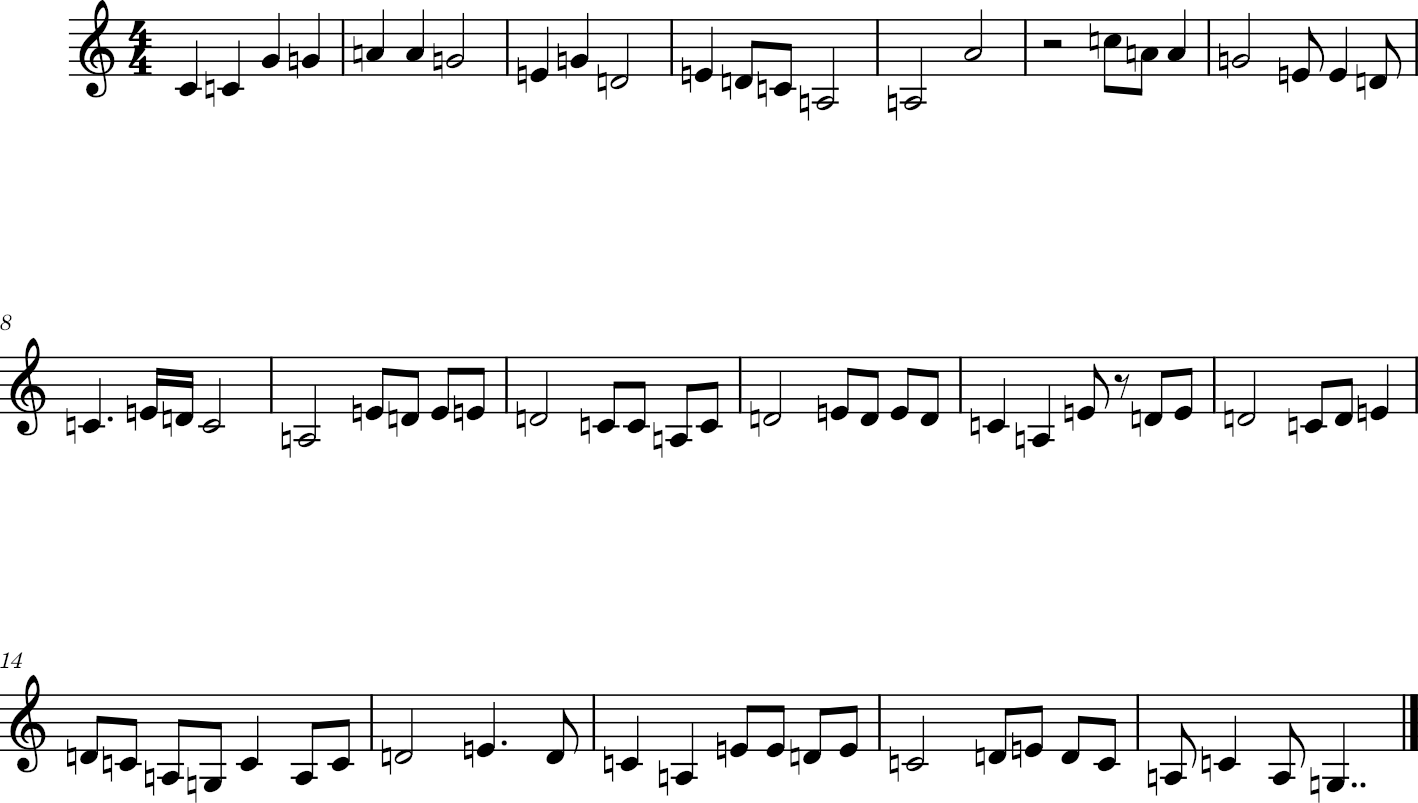

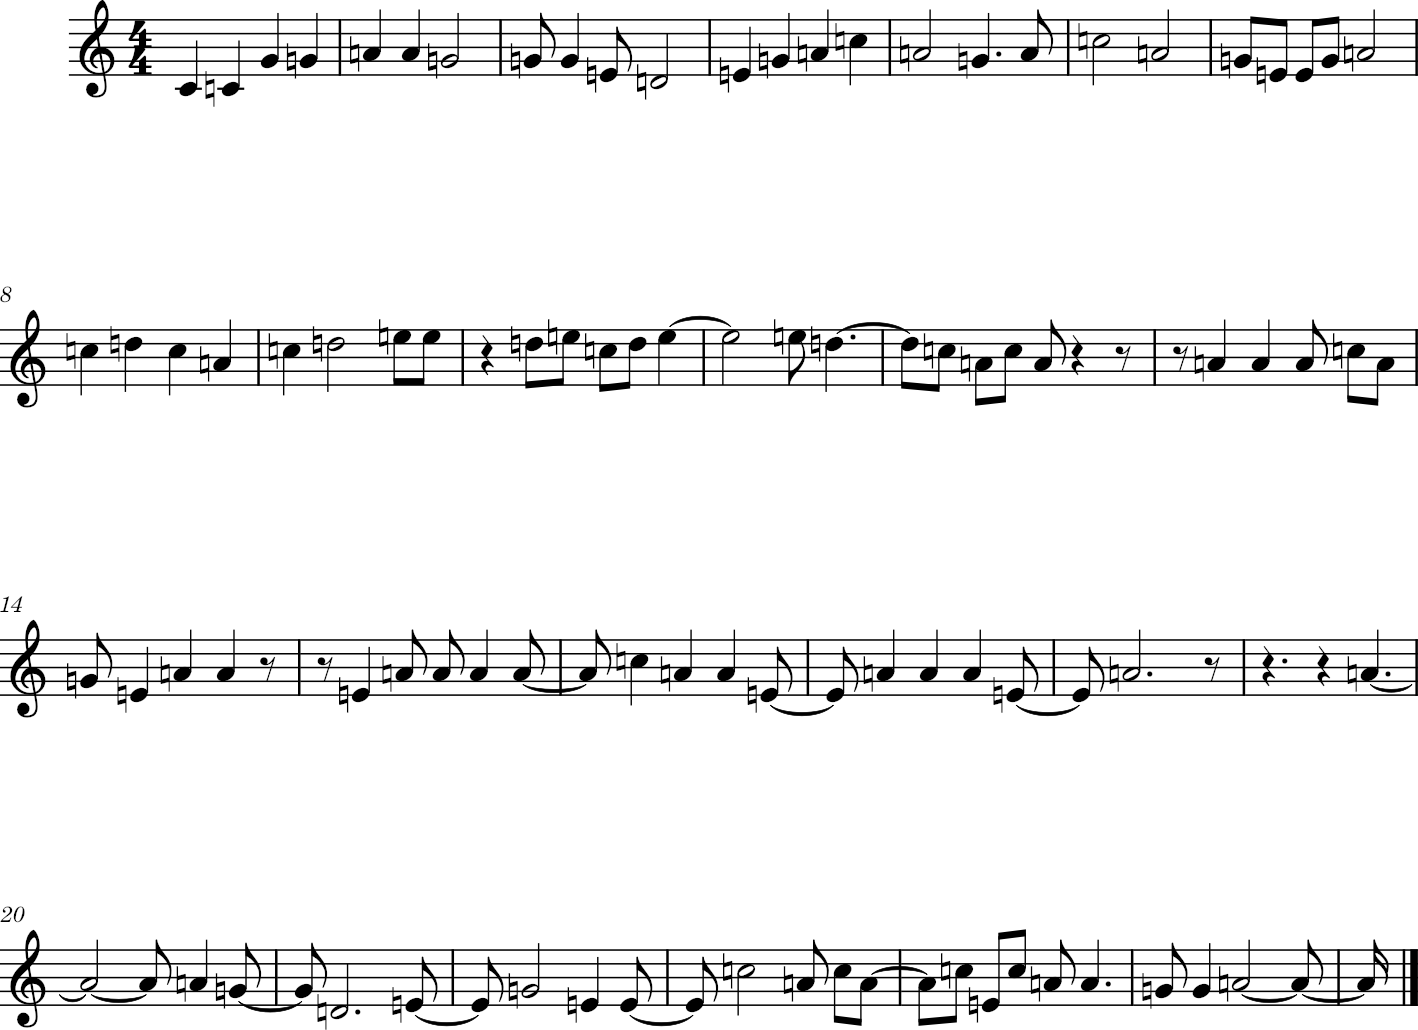

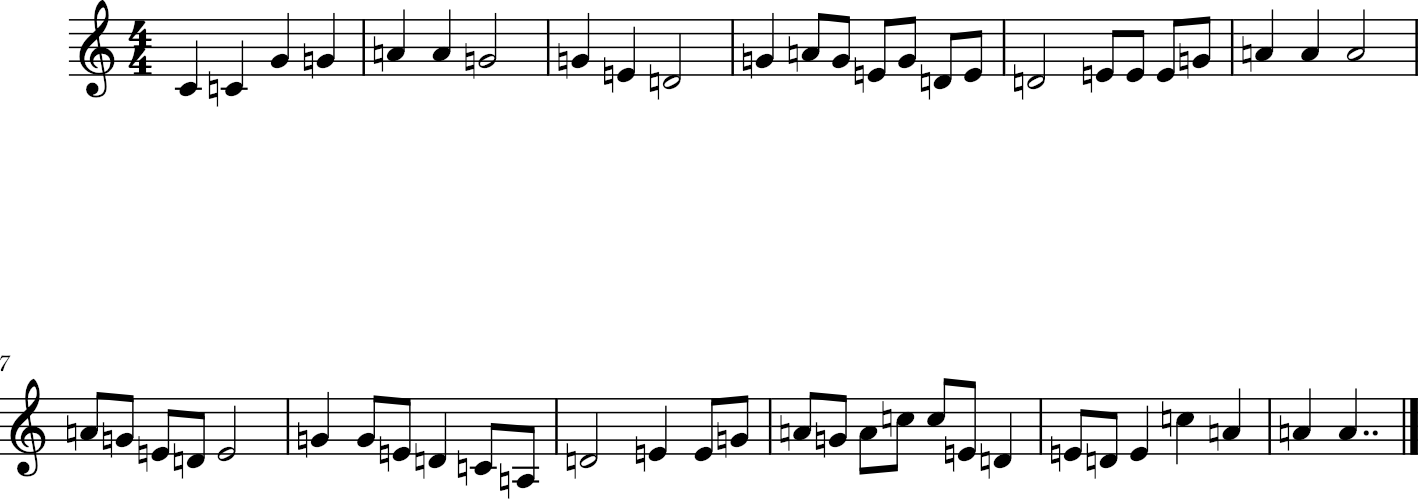

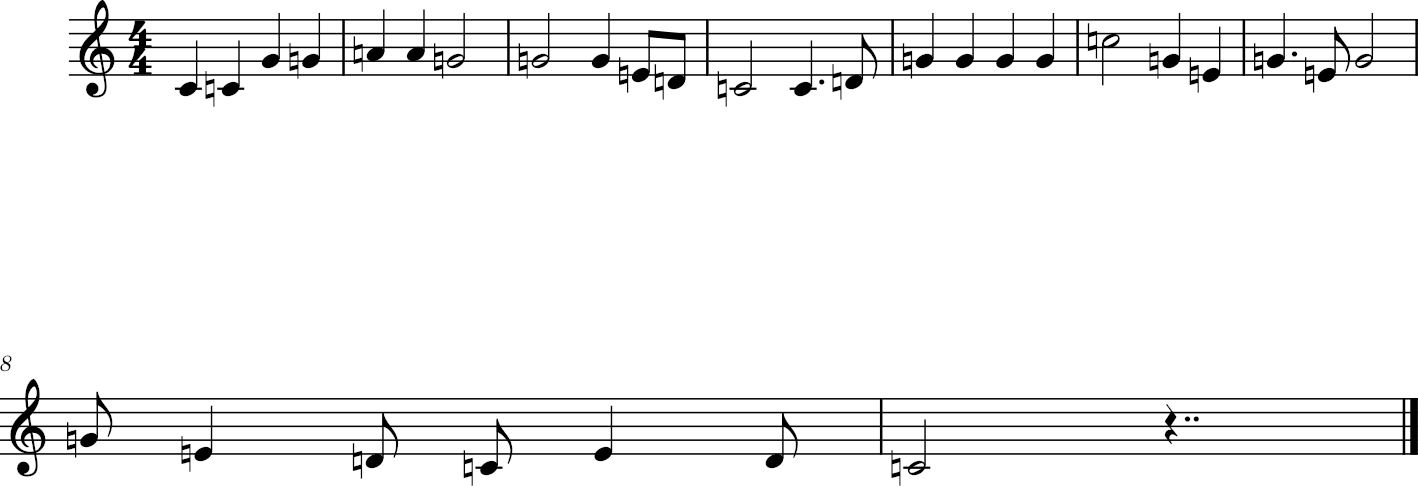

In [8]:
# Les mettre en format midi
songs = []
for i in range(10):
    songs.append(convert_to_midi(melodies[i]))

for song in songs:
    song.show("midi")
    song.show()

#songs[5].write("midi", "../generated_melodies/ahVousDiraisJeMaman/ahvousidraisjemaman_han.midi")

### Modèle entraîné sur le dataset deutsch (allemand)

In [9]:
model_deutsch = keras.models.load_model("../data/deutsch/model_RNN_LSTM-25epochs.keras")

# start symboles
start_symbols = ["/"] * 64

# mappings
with open("../data/deutsch/mapping.json", "r") as fp:
    mappings_deutsch = json.load(fp)

In [10]:
# Générer 10 mélodies à partir de ah vous dirais-je maman
melodies_deutsch = []
for _ in range (5):
    melodies_deutsch.append(generate_melody(model_deutsch, start_symbols, mappings_deutsch, test_song[:64], 500, 64, 0.7))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━

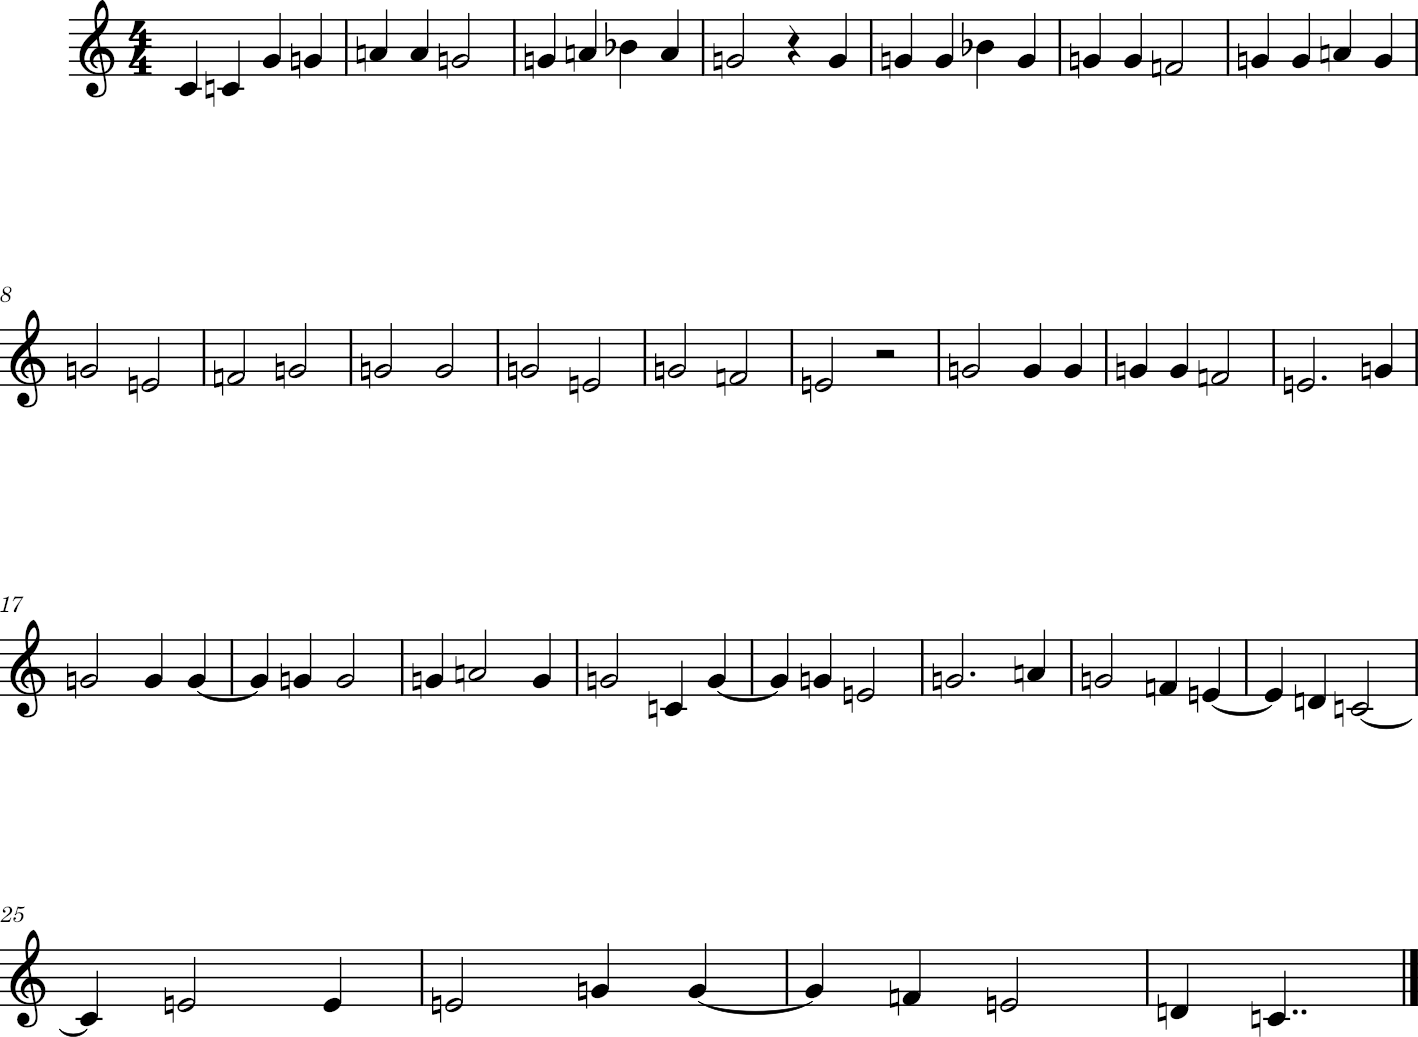

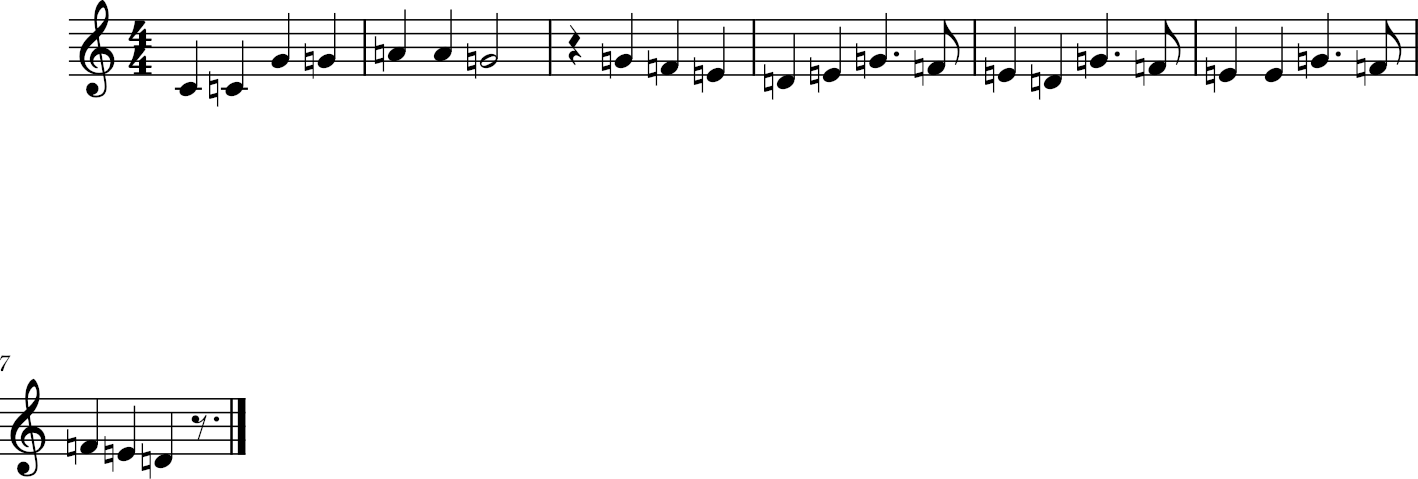

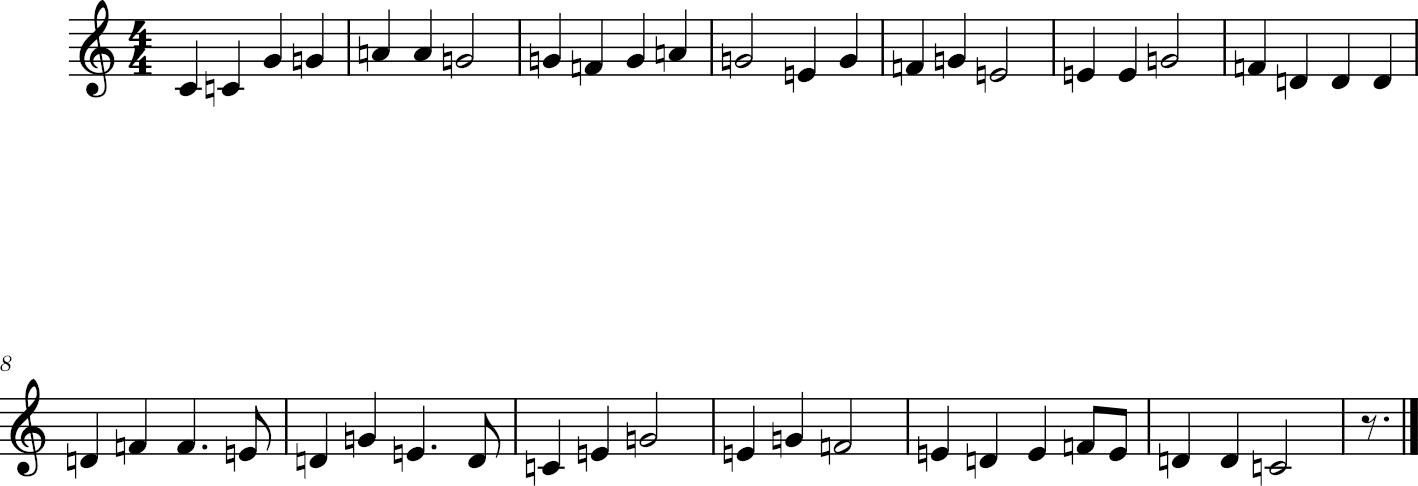

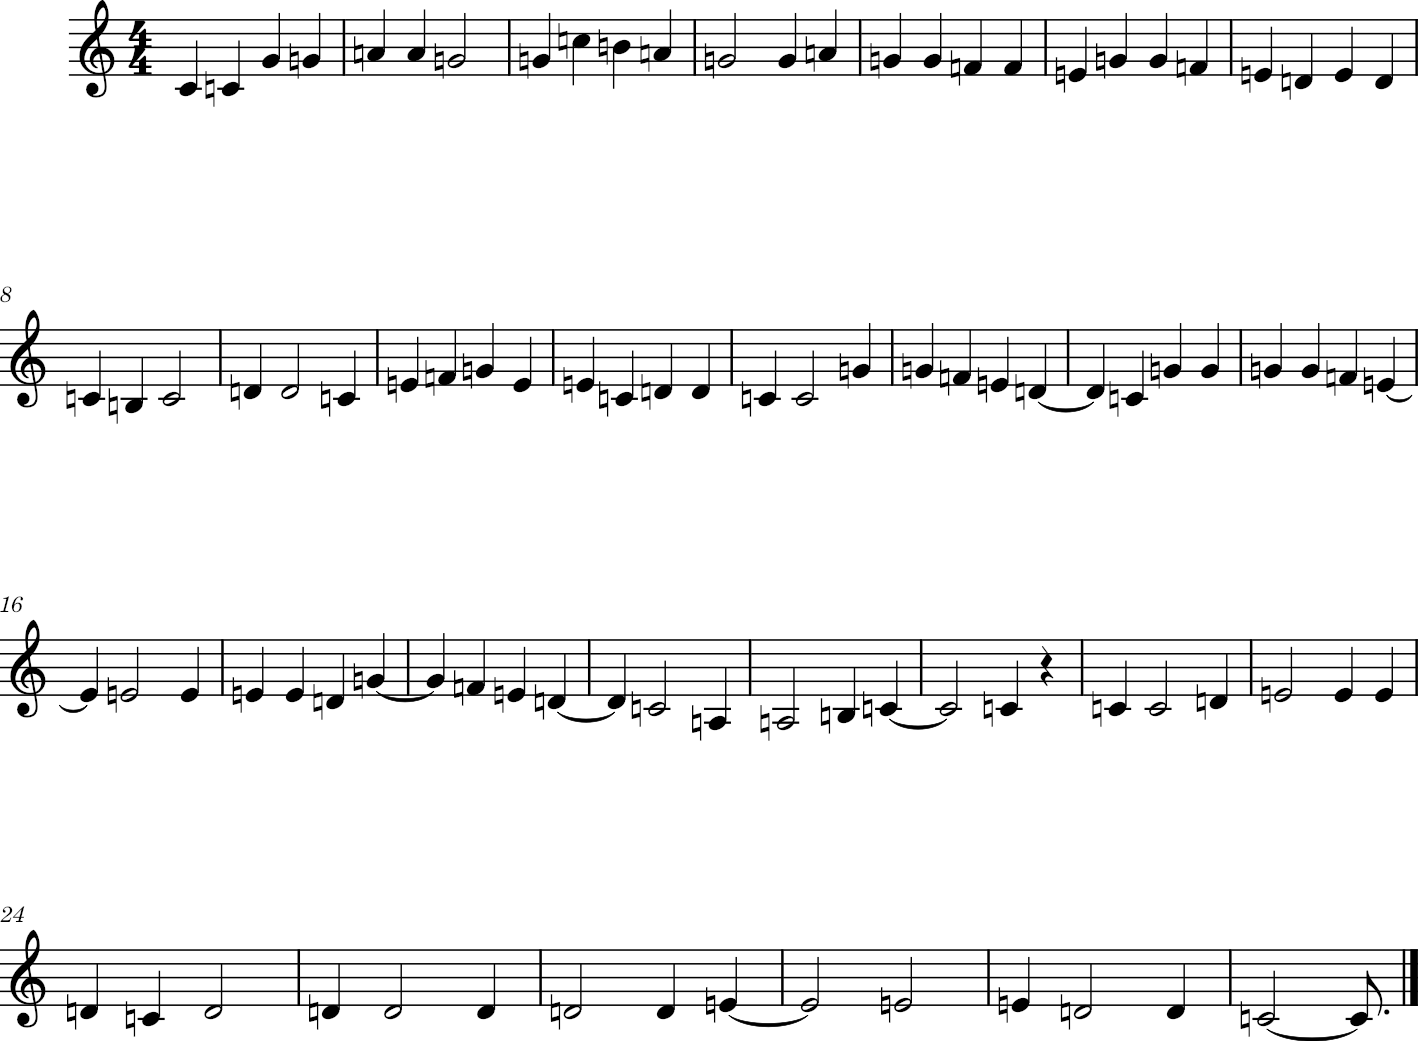

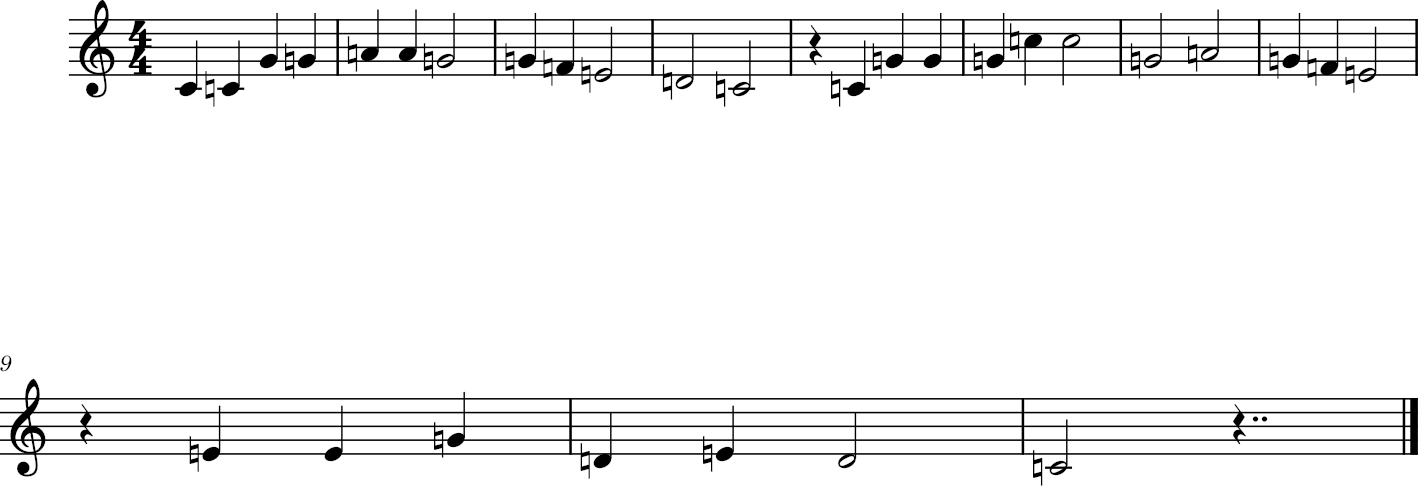

'../generated_melodies/RNN-LSTM/ahVousDiraisJeMaman/deutsch-25.midi'

In [ ]:
# Les mettre en format midi
songs_d = []
for i in range(5):
    songs_d.append(convert_to_midi(melodies_deutsch[i]))

for song in songs_d:
    song.show("midi")
    song.show()

#songs_d[2].write("midi", "../generated_melodies/RNN-LSTM/ahVousDiraisJeMaman/deutsch-25.midi")